In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
)

# Load the smote files with more frauds
# X_train = np.load("./data/X_train_scaled.npy")
X_train = np.load('./data/X_train_smote.npy')
X_test = np.load("./data/X_test_scaled.npy")
# y_train = np.load("./data/y_train.npy")
y_train = np.load('./data/y_train_smote.npy')
y_test = np.load("./data/y_test.npy")

In [2]:
# Funcion auxiliar para evaluar modelos
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))
    print("F1:", f1_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))


In [3]:
# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=1000)
log_reg.fit(X_train, y_train)

evaluate_model(log_reg, X_test, y_test, "Logistic Regression")



=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9965    0.8254    0.9029    239020
           1     0.0450    0.7421    0.0849      2652

    accuracy                         0.8245    241672
   macro avg     0.5208    0.7837    0.4939    241672
weighted avg     0.9861    0.8245    0.8940    241672

Confusion Matrix:
 [[197290  41730]
 [   684   1968]]
AUC: 0.8659552745101826
F1: 0.08491909385113268
Precision: 0.045036386104627214
Recall: 0.7420814479638009


In [4]:
# Ramdom Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)
rf.fit(X_train, y_train)

evaluate_model(rf, X_test, y_test, "Random Forest")


=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9948    0.9040    0.9472    239020
           1     0.0621    0.5728    0.1120      2652

    accuracy                         0.9003    241672
   macro avg     0.5284    0.7384    0.5296    241672
weighted avg     0.9845    0.9003    0.9380    241672

Confusion Matrix:
 [[216067  22953]
 [  1133   1519]]
AUC: 0.8498664922995645
F1: 0.11200412918448606
Precision: 0.062070938215102976
Recall: 0.5727752639517345


In [5]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # balanceo de clases
    eval_metric="logloss",
    tree_method="hist",  # más rápido
    random_state=42
)
xgb.fit(X_train, y_train)

evaluate_model(xgb, X_test, y_test, "XGBoost")


=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9916    0.9852    0.9884    239020
           1     0.1554    0.2447    0.1901      2652

    accuracy                         0.9771    241672
   macro avg     0.5735    0.6150    0.5892    241672
weighted avg     0.9824    0.9771    0.9796    241672

Confusion Matrix:
 [[235492   3528]
 [  2003    649]]
AUC: 0.8646332819798492
F1: 0.19007175281886074
Precision: 0.15537467081637538
Recall: 0.2447209653092006


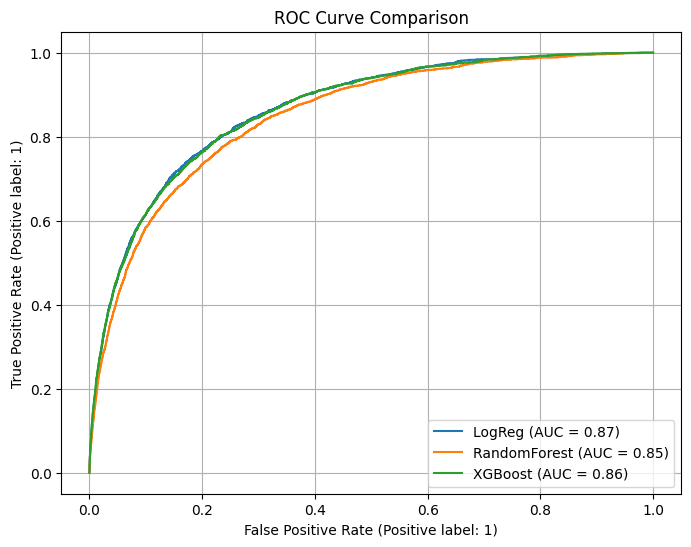

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name="LogReg", ax=ax)
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="RandomForest", ax=ax)
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost", ax=ax)
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()
